## Import Packages and Set Path

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
cd drive/MyDrive/Master\ at\ KU\ Lueven/2nd\ Semester/Big\ Data\ Platforms\ &\ Technologies/Big\ Data\ Assignments/Assignment\ 1

/content/drive/MyDrive/Master at KU Lueven/2nd Semester/Big Data Platforms & Technologies/Big Data Assignments/Assignment 1


## Data Preprocessing

### Load Data

In [ ]:
train = pd.read_csv('data/processed/train.csv', index_col='id')
validation = pd.read_csv('data/processed/validation.csv', index_col='id')
test = pd.read_csv('data/processed/test.csv', index_col='id')
train.head()

,Gender,Age,Connect_Date,L_O_S,Dropped_Calls,tariff,Handset,Peak_calls_Sum,Peak_mins_Sum,OffPeak_calls_Sum,...,Total_Cost,Tariff_OK,average cost min,Peak ratio,OffPeak ratio,Weekend ratio,Nat-InterNat Ratio,high Dropped calls,No Usage,target
id,,,,,,,,,,,,,,,,,,,,,
K324860,M,25.0,09/07/96,51.866667,8.0,CAT 200,CAS30,134.0,639.600000,133.0,...,178.726508,OK,0.141034,0.545967,0.415621,0.038412,0.081737,F,F,1
K412380,M,26.0,31/01/98,32.833333,14.0,Play 100,SOP10,6.0,15.000000,76.0,...,79.555374,OK,0.254464,0.056904,0.759105,0.183991,0.186034,T,F,1
K175310,M,21.0,19/10/99,11.966667,2.0,CAT 200,ASAD90,488.0,1050.600000,40.0,...,282.192176,OK,0.154047,0.715765,0.252214,0.032021,0.248031,F,F,1
K216040,F,21.0,19/03/96,55.600000,7.0,Play 100,S50,30.0,55.800000,110.0,...,83.323911,OK,0.200414,0.156171,0.721243,0.122586,0.163615,F,F,1
K190610,F,22.0,08/07/96,51.900000,10.0,CAT 200,S50,335.0,999.600001,50.0,...,226.426308,OK,0.152957,0.808345,0.123241,0.068413,0.197092,F,F,1


In [ ]:
categorical_columns = train.columns[train.dtypes==object].drop('Connect_Date')
numerical_columns = list(train.columns[train.dtypes!=object].drop('target'))
numerical_columns.append('Connect_Date')

### Date-String to Int

In [ ]:
from datetime import datetime

def date_string_to_time_delta(x, ref_time_point):
  datetime_obj = datetime.strptime(x, '%d/%m/%y')
  return (ref_time_point - datetime_obj).days

In [ ]:
ref_time_point = datetime(year=2024, month=3, day=1)
train.Connect_Date = train.Connect_Date.apply(lambda x: date_string_to_time_delta(x, ref_time_point))
validation.Connect_Date = validation.Connect_Date.apply(lambda x: date_string_to_time_delta(x, ref_time_point))
test.Connect_Date = test.Connect_Date.apply(lambda x: date_string_to_time_delta(x, ref_time_point))

### PCA

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
pca_train = PCA()
std_scaler_train = StandardScaler().fit(train[numerical_columns])
pca_train.fit(std_scaler_train.transform(train[numerical_columns]))

PCA()

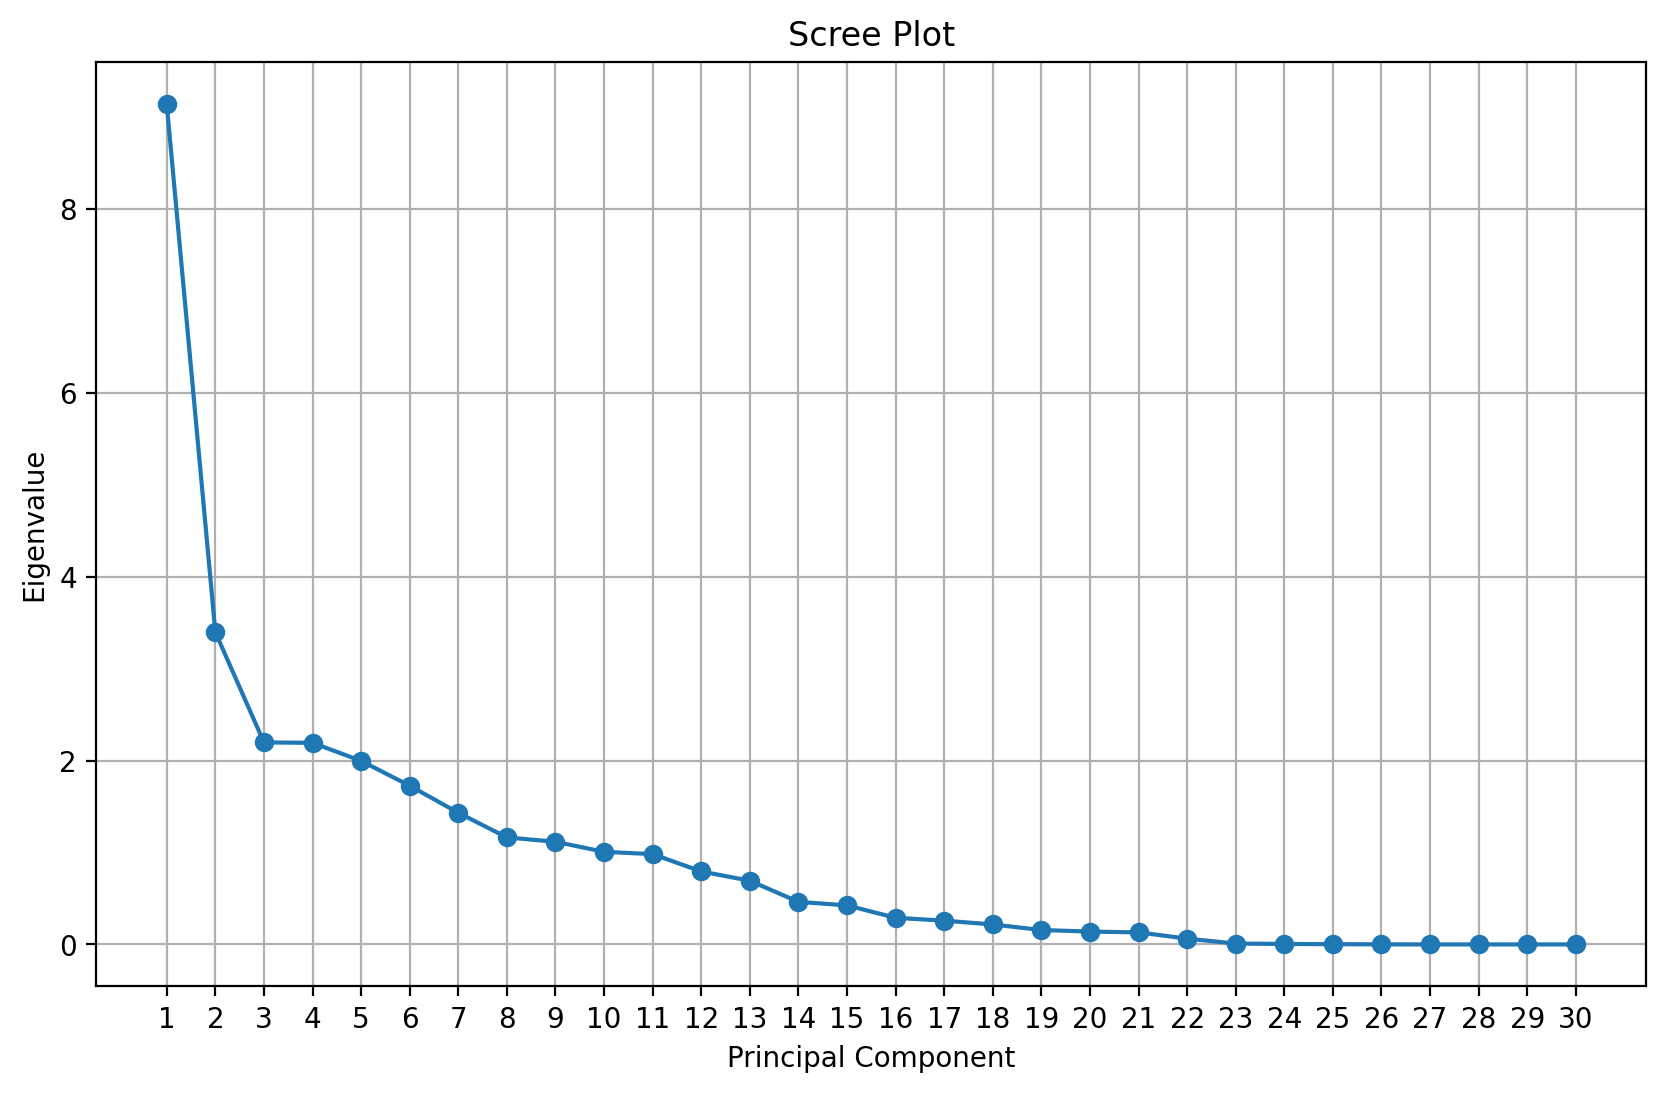

In [ ]:
import matplotlib.pyplot as plt

# Assuming pca_train.explained_variance_ contains the explained variance of principal components
explained_variance = pca_train.explained_variance_

# Plotting the scree plot
plt.figure(figsize=(10, 6), dpi=200)
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.xticks(range(1, len(explained_variance) + 1))
plt.grid(True)
plt.show()

take the top 11st components

In [ ]:
top_k = 11
train_numeric_pca = pd.DataFrame(pca_train.transform(std_scaler_train.transform(train[numerical_columns]))[:,:11], index=train.index)
validation_numeric_pca = pd.DataFrame(pca_train.transform(std_scaler_train.transform(validation[numerical_columns]))[:,:11], index=validation.index)
test_numeric_pca = pd.DataFrame(pca_train.transform(std_scaler_train.transform(test[numerical_columns]))[:,:11], index=test.index)

### One-Hot Encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
for i in categorical_columns:
  print(train[i].value_counts())

Gender
F    2085
M    1950
Name: count, dtype: int64
tariff
CAT 200     1814
CAT 100      829
Play 100     627
Play 300     514
CAT 50       251
Name: count, dtype: int64
Handset
S50        953
BS110      670
S80        599
WC95       551
ASAD170    536
BS210      224
ASAD90     215
CAS30      135
CAS60       88
SOP20       37
SOP10       27
Name: count, dtype: int64
Usage_Band
Med        2219
MedHigh    1022
MedLow      435
High        292
Low          67
Name: count, dtype: int64
Tariff_OK
OK               3998
High CAT 100       24
High CAT 50         9
High Play 100       4
Name: count, dtype: int64
high Dropped calls
F    3933
T     102
Name: count, dtype: int64
No Usage
F    4031
T       4
Name: count, dtype: int64


In [ ]:
one_hot_encoder = OneHotEncoder()
one_hot_encoder.fit(train[categorical_columns])

train_categorial_one_hot = pd.DataFrame(
    one_hot_encoder.transform(train[categorical_columns]).toarray(),
    columns=one_hot_encoder.get_feature_names_out(),
    index=train.index
    )

validation_categorical_one_hot = pd.DataFrame(
    one_hot_encoder.transform(validation[categorical_columns]).toarray(),
    columns=one_hot_encoder.get_feature_names_out(),
    index=validation.index
    )

test_categorical_one_hot = pd.DataFrame(
    one_hot_encoder.transform(test[categorical_columns]).toarray(),
    columns=one_hot_encoder.get_feature_names_out(),
    index=test.index
    )

train_one_hot = pd.concat([train[numerical_columns], train_categorial_one_hot], axis=1)
validation_one_hot = pd.concat([validation[numerical_columns], validation_categorical_one_hot], axis=1)
test_one_hot = pd.concat([test[numerical_columns], test_categorical_one_hot], axis=1)

In [ ]:
train_categorial_one_hot.shape

(4035, 31)

### Dummy

In [ ]:
one_hot_encoder_dummy = OneHotEncoder(drop='first')
one_hot_encoder_dummy.fit(train[categorical_columns])

train_categorial_dummy = pd.DataFrame(
    one_hot_encoder_dummy.transform(train[categorical_columns]).toarray(),
    columns=one_hot_encoder_dummy.get_feature_names_out(),
    index=train.index
    )
validation_categorical_dummy = pd.DataFrame(
    one_hot_encoder_dummy.transform(validation[categorical_columns]).toarray(),
    columns=one_hot_encoder_dummy.get_feature_names_out(),
    index=validation.index
    )
test_categorical_dummy = pd.DataFrame(
    one_hot_encoder_dummy.transform(test[categorical_columns]).toarray(),
    columns=one_hot_encoder_dummy.get_feature_names_out(),
    index=test.index
    )

train_pca_dummy = pd.concat([train_numeric_pca, train_categorial_dummy], axis=1)
validation_pca_dummy = pd.concat([validation_numeric_pca, validation_categorical_dummy], axis=1)
test_pca_dummy = pd.concat([test_numeric_pca, test_categorical_dummy], axis=1)

train_pca_dummy.columns = [str(col) for col in train_pca_dummy.columns]
validation_pca_dummy.columns = [str(col) for col in validation_pca_dummy.columns]
test_pca_dummy.columns = [str(col) for col in test_pca_dummy.columns]

### Save to Drive

In [ ]:
train_pca_dummy['target'] = train.target
validation_pca_dummy['target'] = validation.target
train_pca_dummy.to_csv('data/processed/train_pca_dummy.csv')
validation_pca_dummy.to_csv('data/processed/validation_pca_dummy.csv')
test_pca_dummy.to_csv('data/processed/test_pca_dummy.csv')

train_one_hot['target'] = train.target
validation_one_hot['target'] = validation.target
train_one_hot.to_csv('data/processed/train_one_hot.csv')
validation_one_hot.to_csv('data/processed/validation_one_hot.csv')
test_one_hot.to_csv('data/processed/test_one_hot.csv')

## Models
- Be aware that in training set, 85.23% of 0 and 14.77% of 1.
- The data is inbalanced. make sure the model do better than merely predicting 0.

### Load Data & Define Functions

In [ ]:
train_pca_dummy = pd.read_csv('data/processed/train_pca_dummy.csv', index_col='id')
validation_pca_dummy = pd.read_csv('data/processed/validation_pca_dummy.csv', index_col='id')
test_pca_dummy = pd.read_csv('data/processed/test_pca_dummy.csv', index_col='id')

train_one_hot = pd.read_csv('data/processed/train_one_hot.csv', index_col='id')
validation_one_hot = pd.read_csv('data/processed/validation_one_hot.csv', index_col='id')
test_one_hot = pd.read_csv('data/processed/test_one_hot.csv', index_col='id')

train_pca_dummy_X = train_pca_dummy.drop(['target'], axis=1)
train_one_hot_X = train_one_hot.drop(['target'], axis=1)
train_Y = train_pca_dummy.target

validation_pca_dummy_X = validation_pca_dummy.drop(['target'], axis=1)
validation_one_hot_X = validation_one_hot.drop(['target'], axis=1)
validation_Y = validation_pca_dummy.target

In [ ]:
train_one_hot.shape

(4035, 62)

In [ ]:
from sklearn import metrics

# score function
def calculate_profit_top_k(target, pred_proba, avg_cost_min, k=20):
    # Combine predicted probabilities and true labels into tuples
    combined = list(zip(pred_proba, target, avg_cost_min))

    # Sort the combined list based on predicted probabilities in descending order
    combined_sorted = sorted(combined, key=lambda x: x[0], reverse=True)

    # Take the top 20 predictions
    top_k = combined_sorted[:k]

    # Calculate profit based on true positives in the top 20 predictions
    profit = sum(c for p, t, c in top_k if t == 1)

    return profit

def calculate_scores(target, pred_proba, avg_cost_min, to_print=False):
  auc_score = metrics.roc_auc_score(target, pred_proba)
  profit = calculate_profit_top_k(target, pred_proba, avg_cost_min)

  if to_print:
    print('auc =', auc_score)
    print('profit =', profit)

  return auc_score, profit


def create_prediction_file(test_id, predict_proba):
  result = pd.DataFrame()
  result['ID'] = test_id
  result['PRED'] = predict_proba

  return result.set_index('ID')

def do_dirty_attempt(predict_proba, avg_cost_min):
  original_idx = avg_cost_min.index
  dirty_attempt = pd.DataFrame()
  dirty_attempt['avg_cost_min'] = avg_cost_min
  dirty_attempt['predict_proba'] = predict_proba

  threshold = 0.5
  dirty_attempt['exp_cost_min'] = dirty_attempt.apply(lambda x: x.avg_cost_min*x.predict_proba if x.predict_proba > threshold else 0, axis=1)
  dirty_attempt.sort_values(['exp_cost_min'], ascending=False, inplace=True)
  dirty_attempt.loc[dirty_attempt.index[:20], 'predict_proba'] = [1-1e-9*x for x in range(20)]

  return dirty_attempt.loc[original_idx].exp_cost_min

### Logistic Regresson

In [ ]:
from sklearn.linear_model import LogisticRegression

lf = LogisticRegression(max_iter=10000, class_weight='balanced', penalty=None) # class_weight='balanced'
lf.fit(train_pca_dummy_X, train_Y)
print('train:\n\t', calculate_scores(train_Y, lf.predict_proba(train_pca_dummy_X)[:,1], train_one_hot['average cost min']))
print('validation:\n\t', calculate_scores(validation_Y, lf.predict_proba(validation_pca_dummy_X)[:,1], validation_one_hot['average cost min']))

train:
	 (0.9340731853921949, 3.0300469999999993)
validation:
	 (0.9348212892149212, 3.8044980000000006)


In [ ]:
dirty_proba = do_dirty_attempt(lf.predict_proba(validation_pca_dummy_X)[:,1], validation_one_hot['average cost min'])
calculate_scores(validation_Y, dirty_proba, validation_one_hot['average cost min'])

(0.9027704073669425, 6.049692)

#### Prediction

In [ ]:
lf_best = LogisticRegression(max_iter=10000, class_weight='balanced', penalty=None)
lf_best.fit(
    pd.concat([train_pca_dummy_X, validation_pca_dummy_X]),
    pd.concat([train_Y, validation_Y])
)

LogisticRegression(class_weight='balanced', max_iter=10000, penalty=None)

In [ ]:
test_predict_proba = lf_best.predict_proba(test_pca_dummy)
test_predict_proba_dirty = do_dirty_attempt(test_predict_proba[:,1], test_one_hot['average cost min'])

(1682, 2)
(1682, 3)


In [ ]:
result = create_prediction_file(test_pca_dummy.index, test_predict_proba_dirty.values)
result.to_csv('predictions/logistic_regression.csv')

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_1 = RandomForestClassifier(n_estimators=200, class_weight='balanced_subsample', random_state=21)
rf_1.fit(train_one_hot_X, train_Y)
calculate_scores(validation_Y, rf_1.predict_proba(validation_one_hot_X)[:,1], validation_one_hot['average cost min'])

(0.923700639925082, 2.1201220000000003)

In [ ]:
dirty_proba = do_dirty_attempt(rf_1.predict_proba(validation_one_hot_X)[:,1], validation_one_hot['average cost min'])
calculate_scores(validation_Y, dirty_proba, validation_one_hot['average cost min'])

(0.7704424847822695, 3.599167)

In [ ]:
rf_2 = RandomForestClassifier(n_estimators=200, class_weight='balanced_subsample', random_state=21)
rf_2.fit(train_pca_dummy_X, train_Y)
calculate_scores(validation_Y, rf_2.predict_proba(validation_pca_dummy_X)[:,1], validation_one_hot['average cost min'])

(0.9254370220071796, 2.3103860000000003)

### Random Forest Regressor
-  new_target = it's `average cost min` if `target == 1` else 0

#### Train with (sub)Train Only

In [ ]:
train_one_hot_reg_X = train_one_hot_X#.drop(['average cost min'], axis=1)
train_reg_Y = train_one_hot.apply(lambda x: x['average cost min'] if x.target==1 else 0.1, axis=1)
validation_one_hot_reg_X = validation_one_hot_X#.drop(['average cost min'], axis=1)
validation_reg_Y = validation_one_hot.apply(lambda x: x['average cost min'] if x.target==1 else 0, axis=1)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor()
rf_reg.fit(train_one_hot_reg_X, train_reg_Y)

RandomForestRegressor()

In [ ]:
pred = rf_reg.predict(validation_one_hot_reg_X)
calculate_scores(validation_Y, normalize([pred])[0], validation_one_hot['average cost min'])

(0.9236382082097705, 6.191087)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import normalize
for i in range(-10, 21):
  target_0_value = i/100
  train_reg_Y = train_one_hot.apply(lambda x: x['average cost min'] if x.target==1 else target_0_value, axis=1)

  rf_reg = RandomForestRegressor()
  rf_reg.fit(train_one_hot_reg_X, train_reg_Y)

  pred = rf_reg.predict(validation_one_hot_reg_X)
  auc, profit = calculate_scores(validation_Y, normalize([pred])[0], validation_one_hot['average cost min'], to_print=False)

  print(target_0_value, auc, profit)

-0.1 0.9340955205244265 6.078479
-0.09 0.9341033244888404 5.8697859999999995
-0.08 0.9397143749024505 5.597419
-0.07 0.9376736382082098 5.873746
-0.06 0.9313563290151398 6.2368929999999985
-0.05 0.933131730919307 5.9801839999999995
-0.04 0.9294950835024192 5.985404999999998
-0.03 0.940974715155299 5.963899
-0.02 0.9406079288278446 6.284236999999998
-0.01 0.929916497580771 5.8962509999999995
0.0 0.9277743093491494 5.9714149999999995
0.01 0.9338028718589043 5.895365999999999
0.02 0.9373029498985485 5.977988999999999
0.03 0.9327337287341969 6.355663
0.04 0.9348407991259561 6.497566999999999
0.05 0.9358084907132823 6.5332089999999985
0.06 0.9326127672857812 6.401344999999999
0.07 0.9268027157796159 6.533208999999999
0.08 0.9307827376307164 6.448924
0.09 0.9285312938972999 6.211352
0.1 0.9259950054627752 6.475796999999999
0.11 0.9100749180583736 6.275377999999998
0.12 0.8821172155454973 6.232318
0.13 0.8490088965194319 6.031899
0.14 0.7776962697050103 6.3395
0.15 0.643272982675199 6.040668


#### Train with (sub)Train + Validation

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import normalize
from sklearn import base


one_hot_reg_X = pd.concat([train_one_hot_reg_X, validation_one_hot_reg_X])

best_profit = 0
best_model = 0
for i in range(-10, 21):
  target_0_value = i/100

  train_reg_Y = train_one_hot.apply(lambda x: x['average cost min'] if x.target==1 else target_0_value, axis=1)
  validation_reg_Y = validation_one_hot.apply(lambda x: x['average cost min'] if x.target==1 else target_0_value, axis=1)
  one_hot_reg_Y = pd.concat([train_reg_Y, validation_reg_Y])

  rf_reg = RandomForestRegressor(oob_score=True)
  rf_reg.fit(one_hot_reg_X, one_hot_reg_Y)

  auc, profit = calculate_scores(pd.concat([train_Y, validation_Y]), normalize([rf_reg.oob_prediction_])[0], train_one_hot['average cost min'], to_print=False)

  if profit > best_profit:
    best_profit = profit
    best_model = base.clone(rf_reg)

  print(target_0_value, auc, profit)

-0.1 0.9349327375962259 6.485097
-0.09 0.9331441212331258 7.115305
-0.08 0.9359087722913555 7.267637
-0.07 0.9321466987015865 6.26987
-0.06 0.9329029226400396 7.154235999999999
-0.05 0.9337910642556173 6.738988
-0.04 0.9394860050175552 7.620132999999999
-0.03 0.9333160045023738 7.071701000000001
-0.02 0.932652044880111 6.4153
-0.01 0.935353313007083 7.733534
0.0 0.9326896687383206 7.185543000000001
0.01 0.9370151635076674 7.533039999999999
0.02 0.9322840804245096 7.247846
0.03 0.9353224021194253 7.600992
0.04 0.930881537925942 7.342161
0.05 0.934393358218159 7.9865140000000014
0.06 0.9253987582565634 7.88851
0.07 0.9296789795035837 8.605079
0.08 0.9271702019042981 8.547329999999999
0.09 0.9277988794022647 8.528244
0.1 0.9224828311875244 8.528243999999999
0.11 0.9084013607035193 8.665067
0.12 0.8750082350975957 8.592851
0.13 0.8249805245796197 8.653510999999998
0.14 0.750369603669341 8.674977
0.15 0.6374232496709863 8.513777
0.16 0.4924096598085086 7.960725999999999
0.17 0.4006303947695

In [ ]:
best_target_0_value = 0.1

one_hot_reg_X = pd.concat([train_one_hot_reg_X, validation_one_hot_reg_X])
train_reg_Y = train_one_hot.apply(lambda x: x['average cost min'] if x.target==1 else best_target_0_value, axis=1)
validation_reg_Y = validation_one_hot.apply(lambda x: x['average cost min'] if x.target==1 else best_target_0_value, axis=1)
one_hot_reg_Y = pd.concat([train_reg_Y, validation_reg_Y])

rf_reg_best = RandomForestRegressor(oob_score=True)
rf_reg_best.fit(one_hot_reg_X, one_hot_reg_Y)

calculate_scores(pd.concat([train_Y, validation_Y]), normalize([rf_reg_best.predict(one_hot_reg_X)])[0], train_one_hot['average cost min'])
calculate_scores(pd.concat([train_Y, validation_Y]), normalize([rf_reg_best.oob_prediction_])[0], train_one_hot['average cost min'])


(0.923011126358401, 8.547329999999999)

In [ ]:
calculate_scores(pd.concat([train_Y, validation_Y]), normalize([rf_reg_best.predict(one_hot_reg_X)])[0], train_one_hot['average cost min'])

#calculate_scores(pd.concat([train_Y, validation_Y]), normalize([rf_reg_best.oob_prediction_])[0], train_one_hot['average cost min'])

(0.9798000471469095, 12.127994)

In [ ]:
rf_reg_best = RandomForestRegressor()
rf_reg_best.fit(
    pd.concat([train_one_hot_reg_X, validation_one_hot_reg_X]),
    pd.concat([train_reg_Y, validation_reg_Y])
)

RandomForestRegressor()

In [ ]:
rf_reg_pred = rf_reg_best.predict(pd.concat([train_one_hot_reg_X, validation_one_hot_reg_X]),)
calculate_scores(
    pd.concat([train_Y, validation_Y]),
    rf_reg_pred,
    pd.concat([train_one_hot_X['average cost min'], validation_one_hot_X['average cost min']]),
)

(0.9988033739702225, 12.422505999999998)

In [ ]:
rf_reg_pred = normalize([rf_reg_best.predict(test_one_hot.drop(['average cost min'], axis=1))])[0]
rf_reg_pred_file = create_prediction_file(test_one_hot.index, rf_reg_pred)
rf_reg_pred_file.to_csv('predictions/random_forest_regressor_tuned.csv')

### Linear Regression
- -  new_target = it's `average cost min` if `target == 1` else 0

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()
lr.fit(train_pca_dummy_X, train_reg_Y)

LinearRegression()

In [ ]:
lr_pred = lr.predict(validation_pca_dummy_X)

In [ ]:
calculate_scores(validation_Y, lr_pred, validation_one_hot['average cost min'])

(0.9151943187139068, 4.895988)

### KNN Regressor
- new_target = it's `average cost min` if `target == 1` else 0

In [ ]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

std_scaler_train = StandardScaler().fit(train_pca_dummy_X)
train_pca_dummy_X_std = std_scaler_train.transform(train_pca_dummy_X)
validation_pca_dummy_X_std = std_scaler_train.transform(validation_pca_dummy_X)

for n_neighbors_i in range(1,30):
  knn_reg = KNeighborsRegressor(n_neighbors=n_neighbors_i)
  knn_reg.fit(train_pca_dummy_X_std, train_Y)

  pred = knn_reg.predict(validation_pca_dummy_X_std)
  auc, profit = calculate_scores(validation_Y, knn_reg.predict(validation_pca_dummy_X_std), validation_one_hot_X['average cost min'])
  # acc = metrics.accuracy_score(validation_Y, pred)
  print(n_neighbors_i, auc, profit)

1 0.8212189792414546 3.2617640000000003
2 0.8651865147494928 3.654829000000001
3 0.8968393944123615 3.7077519999999993
4 0.9065436241610738 3.7051410000000002
5 0.9139456844076791 3.667346
6 0.9157444982050882 3.5701780000000007
7 0.9185071016076166 3.3754350000000004
8 0.9228383018573435 3.0858939999999997
9 0.9221710628999532 2.9289189999999996
10 0.9271812080536912 2.9289189999999996
11 0.9373575776494458 2.455478
12 0.938770095208366 2.453722
13 0.937638520368347 2.9992530000000004
14 0.9366942406742624 3.162335
15 0.9356289995317622 3.262807
16 0.9337131262681441 3.2690149999999996
17 0.9323747463711566 2.9401249999999997
18 0.9311105041361012 2.6304349999999994
19 0.9329483377555798 2.668942
20 0.9335687529264867 2.7018750000000002
21 0.9324371780864679 2.8447549999999997
22 0.9314655845169346 2.8675130000000006
23 0.9313953488372093 2.797701
24 0.9302715779616044 2.666064
25 0.9289527079756517 2.4417639999999996
26 0.9312314655845171 2.4565530000000004
27 0.9305915405025753 2.57

### KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

std_scaler_train = StandardScaler().fit(train_pca_dummy_X)
train_pca_dummy_X_std = std_scaler_train.transform(train_pca_dummy_X)
validation_pca_dummy_X_std = std_scaler_train.transform(validation_pca_dummy_X)

for n_neighbors_i in range(1,20):
  knn_reg = KNeighborsClassifier(n_neighbors=n_neighbors_i)
  knn_reg.fit(train_pca_dummy_X_std, train_Y)

  pred = knn_reg.predict(validation_pca_dummy_X_std)
  auc, profit = calculate_scores(validation_Y, knn_reg.predict(validation_pca_dummy_X_std), validation_one_hot_X['average cost min'])
  acc = metrics.accuracy_score(validation_Y, pred)
  print(n_neighbors_i, acc, auc, profit)

1 0.9127849355797819 0.8212189792414546 3.2617640000000003
2 0.8949454905847374 0.7053301076947089 3.654829000000001
3 0.9177403369672944 0.8130287185890432 3.6518810000000004
4 0.9117938553022795 0.7817972530045263 3.458473
5 0.9226957383548068 0.8381301701264242 3.4129680000000002
6 0.9167492566897919 0.8068987045419073 3.488878
7 0.9256689791873142 0.8537459029186826 3.46623
8 0.9197224975222993 0.8308373653816138 3.3624340000000004
9 0.9256689791873142 0.8592945216169814 3.548853
10 0.9207135777998018 0.8369673794287498 3.3624340000000004
11 0.9246778989098117 0.8559388169189948 3.4681850000000005
12 0.9197224975222993 0.839160293429062 3.4972209999999997
13 0.9256689791873142 0.8648431403152801 3.4129680000000002
14 0.9226957383548068 0.8520017168721711 3.4129680000000002
15 0.9256689791873142 0.8620688309661309 3.4129680000000002
16 0.9236868186323092 0.8525831122210082 3.4129680000000002
17 0.9266600594648167 0.8654245356641174 3.4129680000000002
18 0.9226957383548068 0.84922740

### Stacking Regressor (scikit-learn)

In [ ]:
from sklearn.ensemble import StackingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import RidgeCV

In [ ]:
base_estimators = [
    ('lr', RidgeCV()),
    ('rf', RandomForestRegressor()),
    ('gb', GradientBoostingRegressor(
          max_depth = 5,
          learning_rate = 0.06309573444801933,
          n_estimators = 100,
))
]

stacking_reg = StackingRegressor(
    base_estimators,
)

In [ ]:
stacking_reg.fit(
    pd.concat([train_one_hot_reg_X, validation_one_hot_reg_X]),
    pd.concat([train_reg_Y, validation_reg_Y])
)

StackingRegressor(estimators=[('lr', RidgeCV()),
                              ('rf', RandomForestRegressor()),
                              ('gb',
                               GradientBoostingRegressor(learning_rate=0.06309573444801933,
                                                         max_depth=5))],
                  final_estimator=RandomForestRegressor())

In [ ]:
pred = stacking_reg.predict(
    pd.concat([train_one_hot_reg_X, validation_one_hot_reg_X]),
    )
calculate_scores(
    pd.concat([train_Y, validation_Y]),
    pred,
    pd.concat([train_one_hot_X['average cost min'], validation_one_hot_X['average cost min']]),
)

(0.9481819558473878, 5.745033)

#### Prediction

In [ ]:
stacking_reg_pred = stacking_reg.predict(test_one_hot.drop(['average cost min'], axis=1))
stacking_reg_pred_file = create_prediction_file(test_one_hot.index, stacking_reg_pred)
stacking_reg_pred_file.to_csv('predictions/stacking_regressor.csv')

### Self Stacking Models
- Mix regression models with classification models to make prediction

#### Base Estimators
- logistic regressor
- random forest regressor
- random forest classifier
- knn_classifier

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

lf = LogisticRegression(max_iter=10000, class_weight='balanced', penalty=None) # class_weight='balanced'
lf.fit(train_pca_dummy_X, train_Y)

rf_reg = RandomForestRegressor(random_state=21)
train_reg_Y = train_one_hot.apply(lambda x: x['average cost min'] if x.target==1 else 0, axis=1)
rf_reg.fit(train_one_hot_reg_X, train_reg_Y)

rf_c = RandomForestClassifier(class_weight='balanced_subsample', random_state=21)
rf_c.fit(train_one_hot_X, train_Y)

std_scaler_train = StandardScaler().fit(train_pca_dummy_X)
train_pca_dummy_X_std = std_scaler_train.transform(train_pca_dummy_X)
validation_pca_dummy_X_std = std_scaler_train.transform(validation_pca_dummy_X)
knn_c = KNeighborsClassifier(n_neighbors=9)
knn_c.fit(train_pca_dummy_X_std, train_Y)

lf_pred_proba = lf.predict_proba(validation_pca_dummy_X)[:,1]
rf_reg_pred = rf_reg.predict(validation_one_hot_reg_X)
rf_c_pred_proba = rf_c.predict_proba(validation_one_hot_X)[:,1]
knn_c_pred_proba = knn_c.predict_proba(validation_pca_dummy_X_std)[:,1]

#### Final Estimator: Random Forest Regressor
- new_target = it's `average cost min` if `target == 1` else `i`
  - `i` is a hyperparameter needs to be tuned. (we also tuned it in the base estimator: random forest regressor with the final estimator together)

##### Training

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import normalize

for i in range(-30, 31):
  target_0_value_i = i/100
  rf_reg = RandomForestRegressor()
  train_reg_Y = train_one_hot.apply(lambda x: x['average cost min'] if x.target==1 else target_0_value_i, axis=1)
  rf_reg.fit(train_one_hot_reg_X, train_reg_Y)
  rf_reg_pred = rf_reg.predict(validation_one_hot_reg_X)

  for j in range(-30, 31):
    target_0_value_j = j/100
    validation_reg_Y = validation_one_hot.apply(lambda x: x['average cost min'] if x.target==1 else target_0_value_j, axis=1)

    stack_lr = RandomForestRegressor(oob_score=True)
    stack_lr.fit(
      np.array([lf_pred_proba, rf_reg_pred, rf_c_pred_proba, knn_c_pred_proba]).T,
      validation_reg_Y
    )

    auc, profit = calculate_scores(validation_Y, normalize([stack_lr.oob_prediction_])[0], validation_one_hot['average cost min'], to_print=False)

    print(target_0_value_i, target_0_value_j, auc, profit)

-0.3 -0.3 0.9283752146090213 4.051200000000001
-0.3 -0.29 0.927013422818792 3.7313900000000007
-0.3 -0.28 0.9214804120493211 4.720199
-0.3 -0.27 0.9252770407366941 3.8011680000000005
-0.3 -0.26 0.9219018261276729 4.276978000000001
-0.3 -0.25 0.9268573435305135 4.457497999999999
-0.3 -0.24 0.9236772280318403 3.7220840000000006
-0.3 -0.23 0.92579600437022 3.371894
-0.3 -0.22 0.9195060090525987 4.597512
-0.3 -0.21 0.9268690494771342 3.8654699999999993
-0.3 -0.2 0.9264086155767131 5.101701
-0.3 -0.19 0.9302793819260186 3.7314100000000003
-0.3 -0.18 0.9154986733260495 5.010663
-0.3 -0.17 0.9243990947401279 4.423823
-0.3 -0.16 0.9305993444669892 4.849602
-0.3 -0.15 0.9292492586233806 5.052912999999999
-0.3 -0.14 0.9242430154518495 4.216461000000001
-0.3 -0.13 0.9220930232558139 4.568672
-0.3 -0.12 0.9278055252068051 5.170700999999999
-0.3 -0.11 0.9319884501326674 5.162339999999999
-0.3 -0.1 0.9213594506009053 4.144508
-0.3 -0.09 0.9195645387857031 5.1452409999999995
-0.3 -0.08 0.926373497736

##### Prediction

In [ ]:
lf_pred_proba = lf.predict_proba(
    test_pca_dummy
    )[:,1]

rf_reg_pred = rf_reg.predict(
    test_one_hot.drop(['average cost min'], axis=1)
    )
rf_c_pred_proba = rf_c.predict_proba(
    test_one_hot
    )[:,1]

knn_c_pred_proba = knn_c.predict_proba(
    std_scaler_train.transform(test_pca_dummy)
    )[:,1]

In [ ]:
stack_lr_pred = stack_lr.predict(
    (np.array([lf_pred_proba, rf_reg_pred, rf_c_pred_proba, knn_c_pred_proba,]).T)
)
stack_lr_pred = create_prediction_file(test_one_hot.index, stack_lr_pred)
stack_lr_pred.to_csv('predictions/self_stack_regressor_rf.csv')

#### Final Estimator: RidgeCV

- new_target = it's `average cost min` if `target == 1` else `i`
  - `i` is a hyperparameter needs to be tuned. (we also tuned it in the base estimator: random forest regressor with the final estimator together)

##### Training

In [ ]:
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import normalize


for i in range(-30, 31):
  target_0_value_i = i/100
  rf_reg = RandomForestRegressor()
  train_reg_Y = train_one_hot.apply(lambda x: x['average cost min'] if x.target==1 else target_0_value_i, axis=1)
  rf_reg.fit(train_one_hot_reg_X, train_reg_Y)
  rf_reg_pred = rf_reg.predict(validation_one_hot_reg_X)

  stack_X = np.array([lf_pred_proba, rf_reg_pred, rf_c_pred_proba, knn_c_pred_proba, lf_pred_proba**2, rf_reg_pred**2, rf_c_pred_proba**2, knn_c_pred_proba**2])

  for i in range(-30, 31):
    target_0_value = i/100
    validation_reg_Y = validation_one_hot.apply(lambda x: x['average cost min'] if x.target==1 else target_0_value, axis=1)

    stack_lr = RidgeCV()
    stack_lr.fit(
      stack_X.T,
      validation_reg_Y
    )
    pred = stack_lr.predict(stack_X.T)
    auc, profit = calculate_scores(validation_Y, normalize([pred])[0], validation_one_hot['average cost min'], to_print=False)

    print(target_0_value_i, target_0_value, auc, profit)

-0.3 -0.3 0.9412595598564071 5.785919000000001
-0.3 -0.29 0.9412829717496488 5.8019050000000005
-0.3 -0.28 0.9412751677852348 5.8019050000000005
-0.3 -0.27 0.9412751677852349 5.8019050000000005
-0.3 -0.26 0.9412361479631653 5.8019050000000005
-0.3 -0.25 0.9412049321055096 5.8019050000000005
-0.3 -0.24 0.9411893241766819 5.8019050000000005
-0.3 -0.23 0.9412127360699235 5.8019050000000005
-0.3 -0.22 0.9412127360699235 5.8019050000000005
-0.3 -0.21 0.9411425003901982 5.8019050000000005
-0.3 -0.2 0.941173716247854 5.8019050000000005
-0.3 -0.19 0.9411737162478538 5.8019050000000005
-0.3 -0.18 0.9410878726393009 5.8019050000000005
-0.3 -0.17 0.9410488528172313 5.8019050000000005
-0.3 -0.16 0.9409864211019198 5.8019050000000005
-0.3 -0.15 0.9410020290307476 5.801905000000001
-0.3 -0.14 0.9409474012798502 5.801905000000001
-0.3 -0.13 0.9408771656001249 5.801905000000001
-0.3 -0.12 0.9407835180271579 5.801905000000001
-0.3 -0.11 0.9407835180271578 5.801905000000001
-0.3 -0.1 0.9407288902762604 

In [ ]:
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import normalize

rf_reg = RandomForestRegressor(random_state=21)
train_reg_Y = train_one_hot.apply(lambda x: x['average cost min'] if x.target==1 else 0.21, axis=1)
rf_reg.fit(train_one_hot_reg_X, train_reg_Y)
rf_reg_pred = rf_reg.predict(validation_one_hot_reg_X)

stack_X = np.array([lf_pred_proba, rf_reg_pred, rf_c_pred_proba, knn_c_pred_proba, lf_pred_proba**2, rf_reg_pred**2, rf_c_pred_proba**2, knn_c_pred_proba**2])


validation_reg_Y = validation_one_hot.apply(lambda x: x['average cost min'] if x.target==1 else 0.01, axis=1)

stack_lr = RidgeCV()
stack_lr.fit(
  stack_X.T,
  validation_reg_Y
)
pred = stack_lr.predict(stack_X.T)
auc, profit = calculate_scores(validation_Y, normalize([pred])[0], validation_one_hot['average cost min'], to_print=True)

auc = 0.9305837365381613
profit = 6.522663999999999


##### Prediction

In [ ]:
lf_pred_proba = lf.predict_proba(
    pd.concat([train_pca_dummy_X, validation_pca_dummy_X]),
    )[:,1]

rf_reg_pred = rf_reg.predict(
    pd.concat([train_one_hot_reg_X, validation_one_hot_reg_X]),
    )
rf_c_pred_proba = rf_c.predict_proba(
    pd.concat([train_one_hot_X, validation_one_hot_X]),
    )[:,1]

knn_c_pred_proba = knn_c.predict_proba(
    np.concatenate([train_pca_dummy_X_std, validation_pca_dummy_X_std])
    )[:,1]


pred = stack_lr.predict(np.array([lf_pred_proba, rf_reg_pred, rf_c_pred_proba, knn_c_pred_proba, lf_pred_proba**2, rf_reg_pred**2, rf_c_pred_proba**2, knn_c_pred_proba**2]).T)

calculate_scores(
    pd.concat([train_Y, validation_Y]),
    pred,
    pd.concat([train_one_hot_X['average cost min'], validation_one_hot_X['average cost min']]),
    )

(0.9304984302577001, 12.630116)

In [ ]:
lf_pred_proba = lf.predict_proba(
    test_pca_dummy
    )[:,1]

rf_reg_pred = rf_reg.predict(
    test_one_hot#.drop(['average cost min'], axis=1)
    )
rf_c_pred_proba = rf_c.predict_proba(
    test_one_hot
    )[:,1]

knn_c_pred_proba = knn_c.predict_proba(
    std_scaler_train.transform(test_pca_dummy)
    )[:,1]

In [ ]:
stack_lr_pred = stack_lr.predict(
    (np.array([lf_pred_proba, rf_reg_pred, rf_c_pred_proba, knn_c_pred_proba, lf_pred_proba**2, rf_reg_pred**2, rf_c_pred_proba**2, knn_c_pred_proba**2]).T)
)
stack_lr_pred = create_prediction_file(test_one_hot.index, stack_lr_pred)
stack_lr_pred.to_csv('predictions/self_stack_regressor_RidgeCV_4.csv')